In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/login-datathon-2024/sample_submission.csv
/kaggle/input/login-datathon-2024/Train.csv
/kaggle/input/login-datathon-2024/Test.csv


In [2]:
import pandas as pd
df=pd.read_csv('/kaggle/input/login-datathon-2024/Train.csv')
df.head()

,ENTITY_ID,CATEGORY_ID,ENTITY_LENGTH,ENTITY_DESCRIPTION
0,216064,112,600.000000,Caricaturas (1892)
1,2498090,8360,984.251967,VJ Interior Modern Solid Interio Cushioned Bar...
2,210860,30,850.000000,Pam: Personalized Name Journal with Blank Line...
3,285757,6104,744.000000,Hio Nya Testamenti Drottins Vors Jesu Krists A...
4,1869643,2201,600.000000,ADDIT Phone Case for Samsung Galaxy A50 [ Mili...


In [3]:
ad=df.drop("ENTITY_DESCRIPTION",axis=1)
ad.head()


,ENTITY_ID,CATEGORY_ID,ENTITY_LENGTH
0,216064,112,600.000000
1,2498090,8360,984.251967
2,210860,30,850.000000
3,285757,6104,744.000000
4,1869643,2201,600.000000


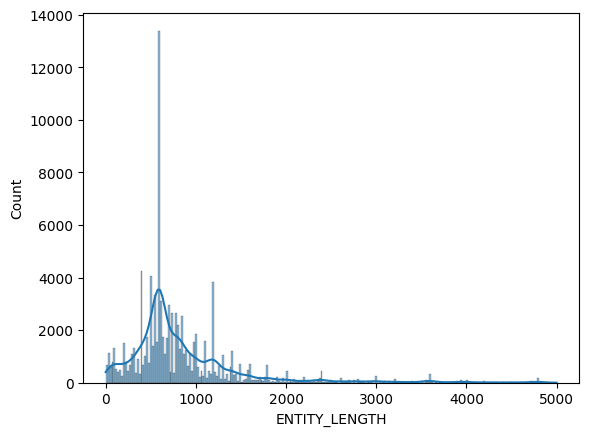

In [44]:
sns.histplot(s['ENTITY_LENGTH'],kde=True)
plt.show()

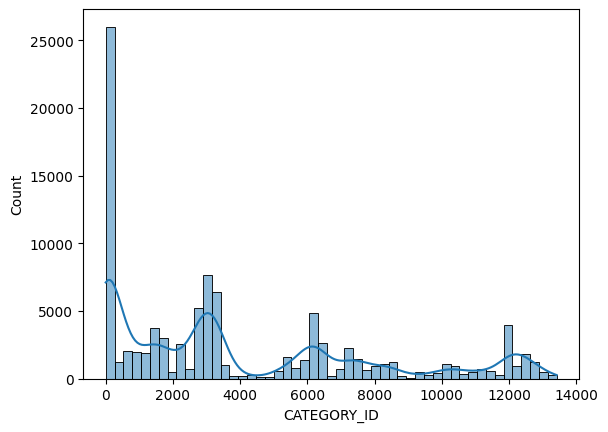

In [45]:
sns.histplot(s['CATEGORY_ID'],kde=True)
plt.show()

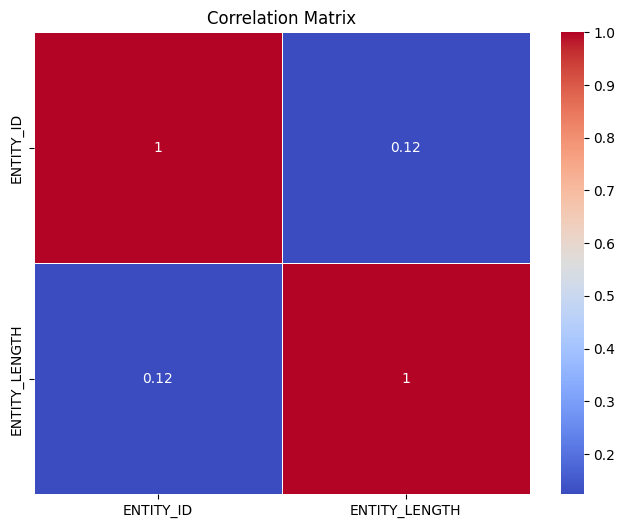

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
ad=ad.drop("CATEGORY_ID",axis=1)
correlation_matrix = ad.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


count    100000.000000
mean        688.469590
std         804.985852
min           1.000000
25%          74.000000
50%         348.000000
75%        1066.000000
max        6871.000000
Name: description_length, dtype: float64


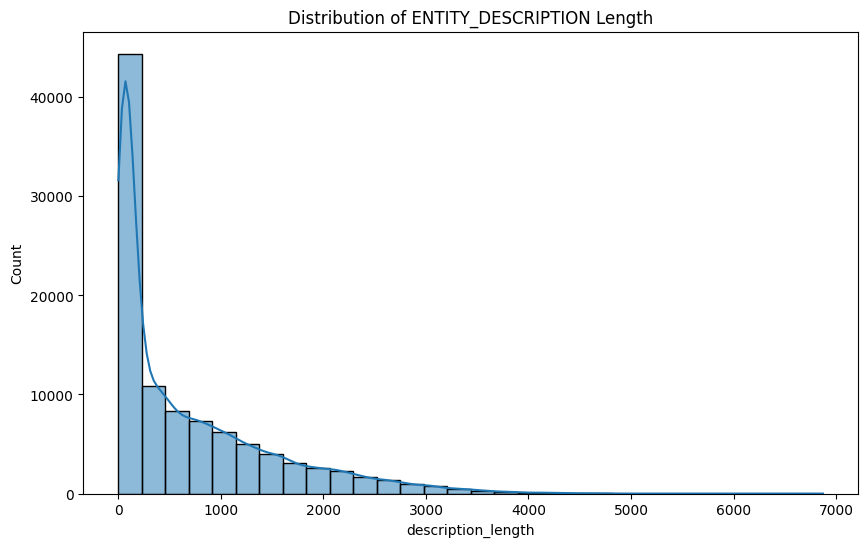

In [5]:
# Length of ENTITY_DESCRIPTION
df['description_length'] =df['ENTITY_DESCRIPTION'].apply(lambda x: len(str(x)))
print(df['description_length'].describe())

# Plotting distribution of description length
plt.figure(figsize=(10, 6))
sns.histplot(df['description_length'], bins=30, kde=True)
plt.title('Distribution of ENTITY_DESCRIPTION Length')
plt.show()


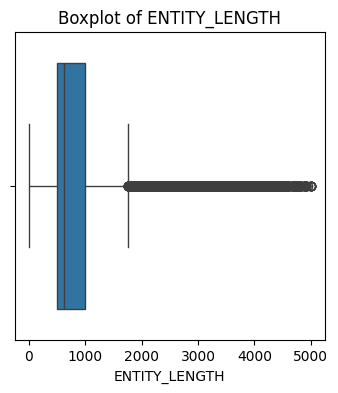

In [52]:
# Boxplot for ENTITY_LENGTH
plt.figure(figsize=(4, 4))
sns.boxplot(x=df['ENTITY_LENGTH'])
plt.title('Boxplot of ENTITY_LENGTH')
plt.show()


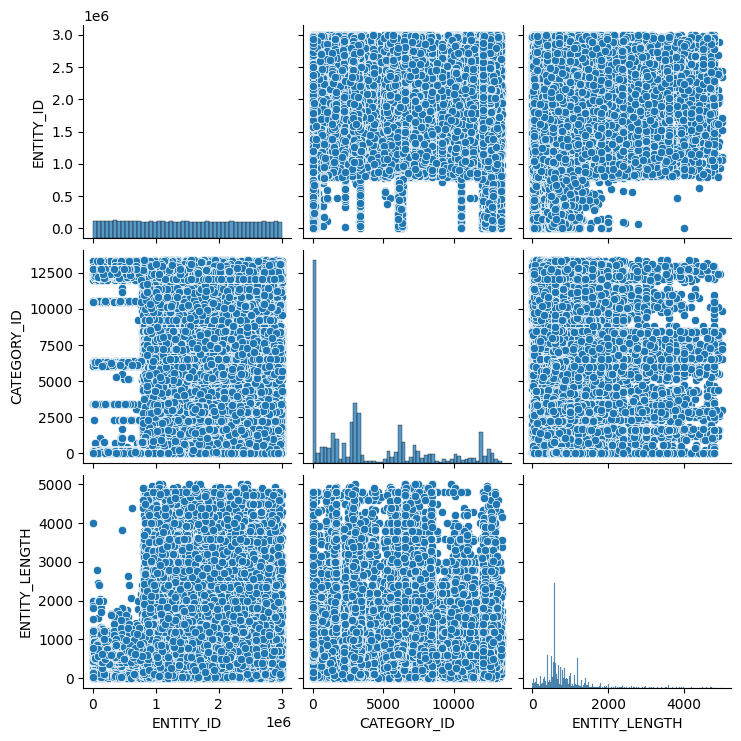

In [7]:
# Pairplot for interactions between features
sns.pairplot(df[['ENTITY_ID', 'CATEGORY_ID', 'ENTITY_LENGTH']])
plt.show()


In [8]:
from wordcloud import WordCloud

# Generate word cloud for ENTITY_DESCRIPTION
text = ' '.join(df['ENTITY_DESCRIPTION'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
# Boxplot of ENTITY_LENGTH by CATEGORY_ID
plt.figure(figsize=(12, 6))
sns.boxplot(x='CATEGORY_ID', y='ENTITY_LENGTH', data=df)
plt.title('ENTITY_LENGTH by CATEGORY_ID')
plt.xticks(rotation=90)
plt.show()


In [11]:
import string
import pandas as pd

# Define a simple list of common stopwords
basic_stopwords = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
    "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as',
    'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
    'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few',
    'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've',
    'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
    'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
    "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't",
    'wouldn', "wouldn't"
])

# Define a basic function for tokenization and stopword removal
def basic_preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize the text by splitting on whitespace
    tokens = text.split()

    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in basic_stopwords]

    return filtered_tokens

# Assuming 'df' is your DataFrame containing 'ENTITY_DESCRIPTION'
# Apply the basic preprocessing to the 'ENTITY_DESCRIPTION' column
df['processed_description'] = df['ENTITY_DESCRIPTION'].apply(basic_preprocess_text)

# Save the DataFrame to a new CSV file
df.to_csv('processed_dataset.csv', index=False)

# Display the first few processed descriptions (optional)
print(df[['ENTITY_DESCRIPTION', 'processed_description']].head())


                                  ENTITY_DESCRIPTION  \
0                               Caricaturas (1892)     
1  VJ Interior Modern Solid Interio Cushioned Bar...   
2  Pam: Personalized Name Journal with Blank Line...   
3  Hio Nya Testamenti Drottins Vors Jesu Krists A...   
4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...   

                               processed_description  
0                                [caricaturas, 1892]  
1  [vj, interior, modern, solid, interio, cushion...  
2  [pam, personalized, name, journal, blank, line...  
3  [hio, nya, testamenti, drottins, vors, jesu, k...  
4  [addit, phone, case, samsung, galaxy, a50, mil...  


In [12]:
df.head()

,ENTITY_ID,CATEGORY_ID,ENTITY_LENGTH,ENTITY_DESCRIPTION,description_length,processed_description
0,216064,112,600.000000,Caricaturas (1892),20,"[caricaturas, 1892]"
1,2498090,8360,984.251967,VJ Interior Modern Solid Interio Cushioned Bar...,592,"[vj, interior, modern, solid, interio, cushion..."
2,210860,30,850.000000,Pam: Personalized Name Journal with Blank Line...,55,"[pam, personalized, name, journal, blank, line..."
3,285757,6104,744.000000,Hio Nya Testamenti Drottins Vors Jesu Krists A...,73,"[hio, nya, testamenti, drottins, vors, jesu, k..."
4,1869643,2201,600.000000,ADDIT Phone Case for Samsung Galaxy A50 [ Mili...,1786,"[addit, phone, case, samsung, galaxy, a50, mil..."


In [13]:
import re

# Function to join words and remove punctuation
def clean_description(desc):
    # Join list of words into a single string
    joined_desc = ' '.join(desc)
    # Remove punctuations using regex (keeping alphanumeric and spaces)
    cleaned_desc = re.sub(r'[^\w\s]', '', joined_desc)
    return cleaned_desc

df['processed_description'] = df['processed_description'].apply(clean_description)

# Show the first few rows to verify the result
print(df[['ENTITY_DESCRIPTION', 'processed_description']].head())


                                  ENTITY_DESCRIPTION  \
0                               Caricaturas (1892)     
1  VJ Interior Modern Solid Interio Cushioned Bar...   
2  Pam: Personalized Name Journal with Blank Line...   
3  Hio Nya Testamenti Drottins Vors Jesu Krists A...   
4  ADDIT Phone Case for Samsung Galaxy A50 [ Mili...   

                               processed_description  
0                                   caricaturas 1892  
1  vj interior modern solid interio cushioned bar...  
2    pam personalized name journal blank lined paper  
3  hio nya testamenti drottins vors jesu krists a...  
4  addit phone case samsung galaxy a50 military g...  


In [15]:
s=df.drop(['ENTITY_DESCRIPTION','description_length'],axis=1)
s.head()

,ENTITY_ID,CATEGORY_ID,ENTITY_LENGTH,processed_description
0,216064,112,600.000000,caricaturas 1892
1,2498090,8360,984.251967,vj interior modern solid interio cushioned bar...
2,210860,30,850.000000,pam personalized name journal blank lined paper
3,285757,6104,744.000000,hio nya testamenti drottins vors jesu krists a...
4,1869643,2201,600.000000,addit phone case samsung galaxy a50 military g...


In [34]:
def description_to_vector(desc):
    doc = nlp(desc)
    vectors = [token.vector for token in doc if token.has_vector]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(nlp.vocab.vectors_length)  # Return a zero vector if no tokens have vectors


In [35]:
def description_to_vector(desc):
    doc = nlp(desc, disable=["parser", "ner"])  # Only keep tokenization and vectors
    vectors = [token.vector for token in doc if token.has_vector]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(nlp.vocab.vectors_length)


In [41]:
print(len(s))

100000


In [42]:
s=s.drop_duplicates()

In [43]:
print(len(s))

100000


In [40]:
import spacy
import numpy as np

# Load spaCy's small English model (it has word vectors)
nlp = spacy.load('en_core_web_md')

# Function to get the average vector for the description
def description_to_vector(desc):
    # Process the description using spaCy
    doc = nlp(desc)
    # Return the average vector (mean of word vectors in the description)
    return np.mean([token.vector for token in doc if token.has_vector], axis=0)

# Apply the function to the processed_description column
s['description_vector'] = s['processed_description'].apply(description_to_vector)

# Show the updated dataframe with the vectorized column
print(s[['processed_description', 'description_vector']].head())


KeyboardInterrupt: 